📊Exploratory Data Analysis with Mood Index visualizations and annotated market events

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from datetime import datetime
from pathlib import Path

In [2]:
#Openig cleaned_data.csv
df = pd.read_csv("../data/cleaned/cleaned_data.csv", parse_dates=["Date"])

In [3]:
# Define relative path using pathlib
output_path = Path("../images/eda")
output_path.mkdir(parents=True, exist_ok=True)

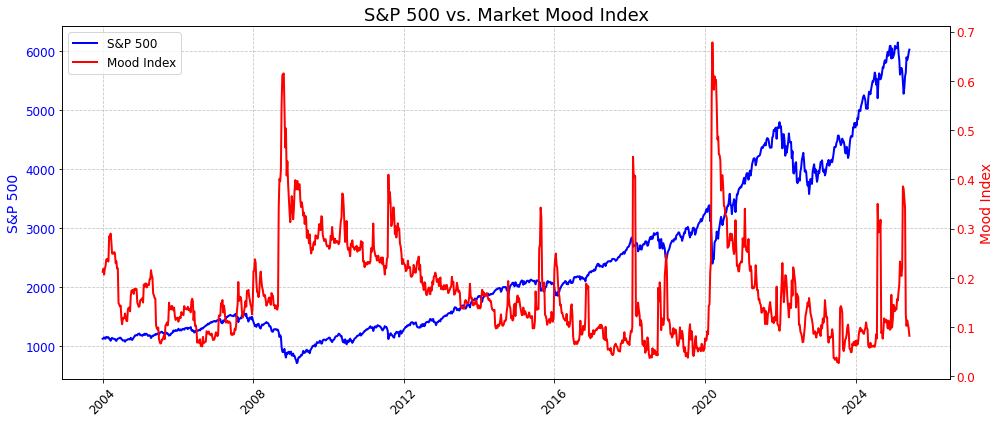

In [4]:
# 📈 Mood Index vs. S&P 500
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot S&P 500 on primary y-axis
ax1.plot(df["Date"], df["Close"], color='blue', label="S&P 500", linewidth=2)
ax1.set_ylabel("S&P 500", color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=12)
ax1.tick_params(axis='x', labelsize=12, rotation=45)

# Add title with larger font and color
ax1.set_title("S&P 500 vs. Market Mood Index", fontsize=18, color='black')

# Secondary y-axis for Mood Index
ax2 = ax1.twinx()
ax2.plot(df["Date"], df["Mood_Index"], color='red', label="Mood Index", linewidth=2)
ax2.set_ylabel("Mood Index", color='red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)

# Add combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=12)

# Grid for readability
ax1.grid(True, which='major', linestyle='--', alpha=0.7)

# Making sure layout doesn't clip
fig.tight_layout()

# Saving
fig.savefig(output_path / "mood_vs_sp500.png", dpi=300, bbox_inches="tight", facecolor='white')

# Displaying
plt.show()

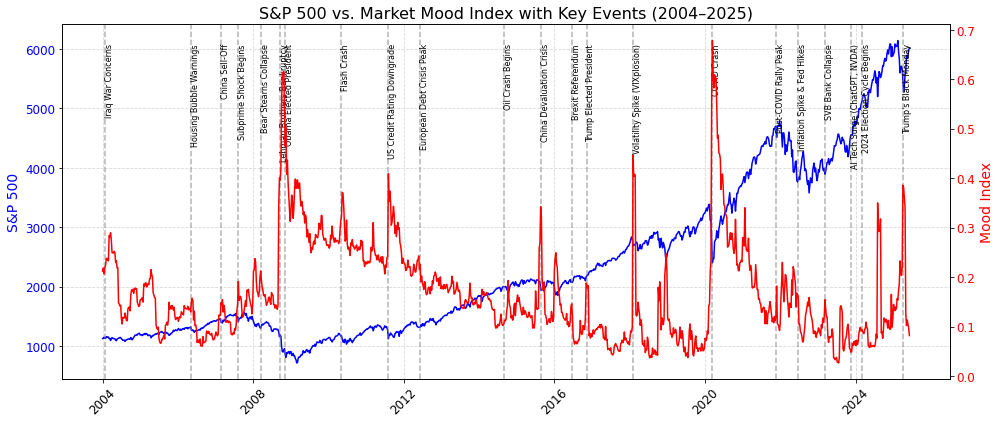

In [5]:
# 📌 Annotated S&P 500 vs Mood Index with Key Market Events 

fig, ax1 = plt.subplots(figsize=(14, 6))

# S&P 500 line
ax1.plot(df["Date"], df["Close"], color='blue', label="S&P 500")
ax1.set_ylabel("S&P 500", color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=12)
ax1.tick_params(axis='x', labelsize=12, rotation=45)

# Mood Index line
ax2 = ax1.twinx()
ax2.plot(df["Date"], df["Mood_Index"], color='red', label="Mood Index")
ax2.set_ylabel("Mood Index", color='red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)

# ✅ Annotated Historical Events (2004–2025)
annotations = {
    "Iraq War Concerns": "2004-01-23",
    "Housing Bubble Warnings": "2006-05-10",
    "China Sell-Off": "2007-02-27",
    "Subprime Shock Begins": "2007-08-09",
    "Bear Stearns Collapse": "2008-03-17",
    "Lehman Brothers Bankruptcy": "2008-09-15",
    "Obama Elected President": "2008-11-04",
    "Flash Crash": "2010-05-06",
    "US Credit Rating Downgrade": "2011-08-05",
    "European Debt Crisis Peak": "2012-06-11",
    "Oil Crash Begins": "2014-09-01",
    "China Devaluation Crisis": "2015-08-24",
    "Brexit Referendum": "2016-06-24",
    "Trump Elected President": "2016-11-08",
    "Volatility Spike (VIXplosion)": "2018-02-05",
    "COVID Crash": "2020-03-12",
    "Post-COVID Rally Peak": "2021-11-19",
    "Inflation Spike & Fed Hikes": "2022-06-17",
    "SVB Bank Collapse": "2023-03-10",
    "AI Tech Surge (ChatGPT, NVDA)": "2023-11-15",
    "2024 Election Cycle Begins": "2024-03-01",
    "Trump's Black Monday": "2025-04-07"
}

for label, date in annotations.items():
    ax1.axvline(pd.to_datetime(date), color='gray', linestyle='--', alpha=0.6)
    ax1.text(
        pd.to_datetime(date),
        ax1.get_ylim()[1]*0.95,
        label,
        rotation=90,
        verticalalignment='top',
        color='black',
        fontsize=8
    )

# Highlight Panic zones
panic_dates = df[df["Mood_Zone"] == "Panic"]["Date"]
for pdx in panic_dates:
    ax2.axvline(pdx, color='red', linestyle=':', alpha=0.2)

ax1.set_title("S&P 500 vs. Market Mood Index with Key Events (2004–2025)", fontsize=16)
fig.tight_layout()
ax1.grid(True, linestyle='--', alpha=0.5)

# ✅ Saving
fig.savefig(output_path / "mood_vs_sp500_annotated.png", dpi=300, bbox_inches="tight", facecolor='white')

plt.show()

In [6]:
# ➕ Add Lag Features
df["Mood_Index_Lag1"] = df["Mood_Index"].shift(1)
df["SP500_Returns_Lag1"] = df["SP500_Returns"].shift(1)
df["VIX_Change_Lag1"] = df["VIX_Change"].shift(1)
df["Google_Trend_Lag1"] = df["Google_Sentiment_Index"].shift(1)
df["Unemployment_Lag1"] = df["Unemployment"].shift(1)

# Ensure date is the index for plotting
df_plot = df.copy()
df_plot.set_index("Date", inplace=True)

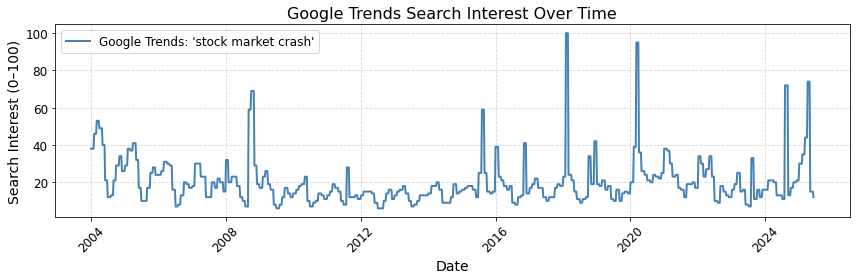

In [7]:
# Google Sentiment Over Time
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(
    df_plot.index,
    df_plot["Google_Sentiment_Index"],
    label="Google Trends: 'stock market crash'",
    color='steelblue',
    linewidth=2
)


ax.set_title("Google Trends Search Interest Over Time", fontsize=16, color='black')
ax.set_ylabel("Search Interest (0–100)", fontsize=14, color='black')
ax.set_xlabel("Date", fontsize=14, color='black')
ax.tick_params(axis='x', labelsize=12, colors='black', rotation=45)
ax.tick_params(axis='y', labelsize=12, colors='black')
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

fig.tight_layout()

fig.savefig(output_path / "google_trends_sentiment.png", dpi=300, bbox_inches="tight", facecolor='white')

plt.show()

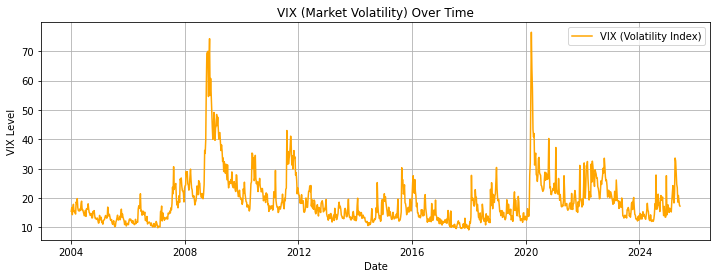

In [8]:
# Plot 2: VIX Over Time
plt.figure(figsize=(12, 4))
plt.plot(df_plot["VIX_Close"], color='orange', label="VIX (Volatility Index)")
plt.title("VIX (Market Volatility) Over Time")
plt.ylabel("VIX Level")
plt.xlabel("Date")
plt.grid(True)
plt.legend()
plt.show()

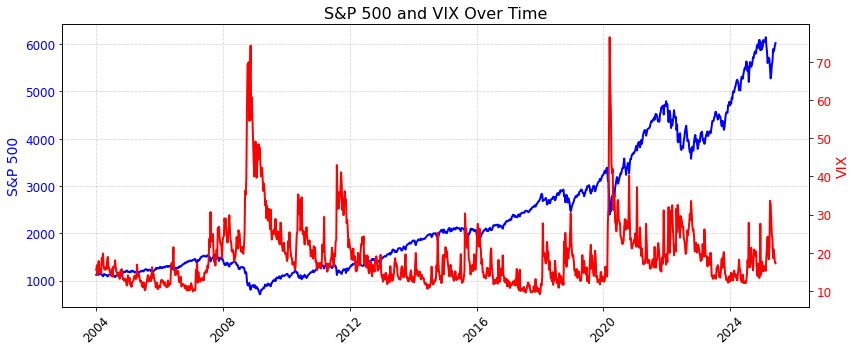

In [9]:
# Overlay S&P 500 with VIX
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot S&P 500
ax1.set_title("S&P 500 and VIX Over Time", fontsize=16, color='black')
ax1.set_ylabel("S&P 500", color="blue", fontsize=14)
ax1.plot(df_plot.index, df_plot["Close"], color="blue", label="S&P 500", linewidth=2)
ax1.tick_params(axis="y", labelcolor="blue", labelsize=12)
ax1.tick_params(axis="x", labelsize=12, rotation=45, colors='black')

# Plot VIX on secondary axis
ax2 = ax1.twinx()
ax2.set_ylabel("VIX", color="red", fontsize=14)
ax2.plot(df_plot.index, df_plot["VIX_Close"], color="red", label="VIX", linewidth=2)
ax2.tick_params(axis="y", labelcolor="red", labelsize=12)

# Grid and layout
ax1.grid(True, linestyle='--', alpha=0.5)
fig.tight_layout()

# ✅ Saving
fig.savefig(output_path /"sp500_vs_vix.png", dpi=300, bbox_inches="tight", facecolor='white')

plt.show()